In [21]:
import numpy as np
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

In [22]:
image_path = "data_coal_subset.PNG"
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

In [23]:
# https://www.reddit.com/r/dataisbeautiful/comments/13pggsx/oc_electricity_production_from_coal_is_growing/

# Calculating the pixels in each bar

Since I don't have the actual data for the graph I have estimated it with pixel values, which are calculated below.

In [24]:
# [255, 255, 255, 255] = White
# [0, 0, 0, 0]
# Indexing row first column second

bars = [] # index 0 = year 2021, index 1 = year 2020 etc

years = 10 # MAX 23!!!

for year in range(years):
    t = 917 # Buttom of bars
    colors = []
    white = 255
    # Column dif -35
    index = -30-(35*year)
    for i in range(1000):
        pixel = list(image_array[t-i][index])
        if pixel[0] == white and pixel[1] == white and pixel[2] == white and pixel[3] == white:
            break
        else:
            colors.append(pixel)
            image_array[t-i][index] = [255,50,100,255] # Draws a line on the plot
        



    manipulated_image_array = image_array
    manipulated_image = Image.fromarray(manipulated_image_array.astype(np.uint8))
    
    # Save the manipulated image
    output_path = "data_coal_subset_MANIPULATED.PNG"
    manipulated_image.save(output_path)

    
    

    color_counts = Counter(map(tuple, colors))

    # Remove keys with a value of 1
    color_counts = Counter({key: count for key, count in color_counts.items() if count != 1})
    bars.append(color_counts)

color_counts

Counter({(44, 44, 44, 255): 460,
         (0, 138, 60, 255): 124,
         (114, 171, 248, 255): 25,
         (249, 224, 6, 255): 3})

In [25]:
# The color for each power type in the graph
coal = (44, 44, 44, 255)
nuclear =  (0, 138, 60, 255)
wind = (114, 171, 248, 255)
solar = (249, 224, 6, 255)

In [26]:
barsData = bars.copy()
len(barsData)

10

# Regression Line for Absolute Pixel Values

In [30]:
new_coal = []
new_nuclear = []
new_wind = []
new_solar = []

for i in barsData:
#    print(i[coal])
    new_coal.append(i[coal])
    new_nuclear.append(i[nuclear])
    new_wind.append(i[wind])
    new_solar.append(i[solar])

# I have to reverse the order since how the data was collected it started from the 2021 bar and then went down.
new_coal.reverse()
new_nuclear.reverse()
new_wind.reverse()
new_solar.reverse()


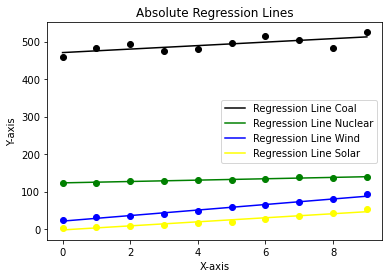

In [31]:
x_coal = list(range(len(new_coal)))
y_coal = new_coal

x_nuclear = list(range(len(new_nuclear)))
y_nuclear = new_nuclear

x_wind = list(range(len(new_wind)))
y_wind = new_wind

x_solar = list(range(len(new_solar)))
y_solar = new_solar


# Calculate the regression line
# Coal
coefficients_coal = np.polyfit(x_coal, y_coal, 1)
slope_coal, intercept_coal = coefficients_coal
regression_line_coal = slope_coal * np.array(x_coal) + intercept_coal

# Nuclear
coefficients_nuclear = np.polyfit(x_nuclear, y_nuclear, 1)
slope_nuclear, intercept_nuclear = coefficients_nuclear
regression_line_nuclear = slope_nuclear * np.array(x_nuclear) + intercept_nuclear

# Wind
coefficients_wind = np.polyfit(x_wind, y_wind, 1)
slope_wind, intercept_wind = coefficients_wind
regression_line_wind = slope_wind * np.array(x_wind) + intercept_wind

# Solar
coefficients_solar = np.polyfit(x_solar, y_solar, 1)
slope_solar, intercept_solar = coefficients_solar
regression_line_solar = slope_solar * np.array(x_solar) + intercept_solar


# Create scatter plots for each power type
plt.scatter(x_coal, y_coal, color="black")
plt.scatter(x_nuclear, y_nuclear, color="green")
plt.scatter(x_wind, y_wind, color="blue")
plt.scatter(x_solar, y_solar, color="yellow")

# Plot regression lines for each power type
plt.plot(x_coal, regression_line_coal, color="black", label="Regression Line Coal")
plt.plot(x_nuclear, regression_line_nuclear, color="green", label="Regression Line Nuclear")
plt.plot(x_wind, regression_line_wind, color="blue", label="Regression Line Wind")
plt.plot(x_solar, regression_line_solar, color="yellow", label="Regression Line Solar")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Absolute Regression Lines")
plt.legend()
plt.show()

In [32]:
print("Coal Slope:",slope_coal)
print("Nuclear Slope:",slope_nuclear)
print("Wind Slope:",slope_wind)
print("Solar Slope:",slope_solar)

Coal Slope: 4.648484848484851
Nuclear Slope: 1.8242424242424304
Wind Slope: 7.375757575757577
Solar Slope: 5.3999999999999995


# Data Visualization of diff

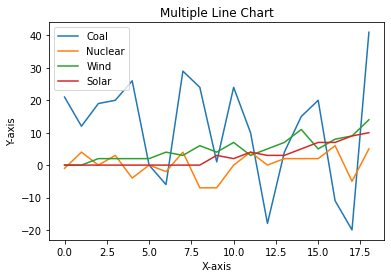

In [10]:
# Could be written cleanere...
powers = [coal, nuclear, wind, solar]

coal_dif = []
for i in range(len(barsData)):
    if i == len(barsData)-1:
        break
    dif = barsData[i][coal] - barsData[i+1][coal]
    coal_dif.append(dif)
coal_dif.reverse()

nuclear_dif = []
for i in range(len(barsData)):
    if i == len(barsData)-1:
        break
    dif = barsData[i][nuclear] - barsData[i+1][nuclear]
    nuclear_dif.append(dif)
nuclear_dif.reverse()

wind_dif = []
for i in range(len(barsData)):
    if i == len(barsData)-1:
        break
    dif = barsData[i][wind] - barsData[i+1][wind]
    wind_dif.append(dif)
wind_dif.reverse()

solar_dif = []
for i in range(len(barsData)):
    if i == len(barsData)-1:
        break
    dif = barsData[i][solar] - barsData[i+1][solar]
    solar_dif.append(dif)
solar_dif.reverse()

    

# Create x-axis values (assumed to be sequential integers)
x_values = range(len(coal_dif))

# Create the line chart with four lines
plt.plot(x_values, coal_dif, label="Coal")
plt.plot(x_values, nuclear_dif, label="Nuclear")
plt.plot(x_values, wind_dif, label="Wind")
plt.plot(x_values, solar_dif, label="Solar")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Chart')

# Display the legend
plt.legend()

# Display the chart
plt.show()

In [11]:
print("Coal:",sum(coal_dif)/len(coal_dif))
print("Nuclear:",sum(nuclear_dif)/len(nuclear_dif))
print("Wind:",sum(wind_dif)/len(wind_dif))
print("Solar:",sum(solar_dif)/len(solar_dif))


Coal: 11.105263157894736
Nuclear: 0.3157894736842105
Wind: 4.947368421052632
Solar: 2.789473684210526


# Regression Line for diff Pixel Values

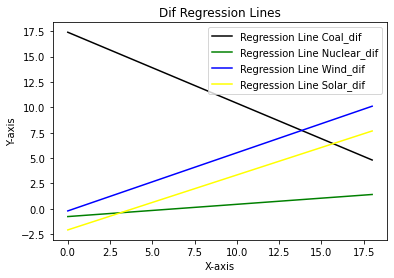

In [12]:
x_coal = list(range(len(coal_dif)))
y_coal = coal_dif

x_nuclear = list(range(len(nuclear_dif)))
y_nuclear = nuclear_dif

x_wind = list(range(len(wind_dif)))
y_wind = wind_dif

x_solar = list(range(len(solar_dif)))
y_solar = solar_dif


# Calculate the regression line
# Coal
coefficients_coal = np.polyfit(x_coal, y_coal, 1)
slope_coal, intercept_coal = coefficients_coal
regression_line_coal = slope_coal * np.array(x_coal) + intercept_coal

# Nuclear
coefficients_nuclear = np.polyfit(x_nuclear, y_nuclear, 1)
slope_nuclear, intercept_nuclear = coefficients_nuclear
regression_line_nuclear = slope_nuclear * np.array(x_nuclear) + intercept_nuclear

# Wind
coefficients_wind = np.polyfit(x_wind, y_wind, 1)
slope_wind, intercept_wind = coefficients_wind
regression_line_wind = slope_wind * np.array(x_wind) + intercept_wind

# Solar
coefficients_solar = np.polyfit(x_solar, y_solar, 1)
slope_solar, intercept_solar = coefficients_solar
regression_line_solar = slope_solar * np.array(x_solar) + intercept_solar


# Create scatter plots for each power type
#plt.scatter(x_coal, y_coal, color="black", label="Coal")
#plt.scatter(x_nuclear, y_nuclear, color="green", label="Nuclear")
#plt.scatter(x_wind, y_wind, color="blue", label="Wind")
#plt.scatter(x_solar, y_solar, color="yellow", label="Solar")

# Plot regression lines for each power type
plt.plot(x_coal, regression_line_coal, color="black", label="Regression Line Coal_dif")
plt.plot(x_nuclear, regression_line_nuclear, color="green", label="Regression Line Nuclear_dif")
plt.plot(x_wind, regression_line_wind, color="blue", label="Regression Line Wind_dif")
plt.plot(x_solar, regression_line_solar, color="yellow", label="Regression Line Solar_dif")

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Dif Regression Lines")
plt.legend()
plt.show()

In [13]:
print("Coal Slope:",slope_coal)
print("Nuclear Slope:",slope_nuclear)
print("Wind Slope:",slope_wind)
print("Solar Slope:",slope_solar)

Coal Slope: -0.6999999999999998
Nuclear Slope: 0.12105263157894736
Wind Slope: 0.5736842105263157
Solar Slope: 0.5421052631578945
